In [37]:
# 
# 
# 
# import packages 

import pandas as pd     # data frame operations
import numpy as np      # arrays and math functions
from scipy.stats import uniform    #for training and test splits
import matplotlib.pyplot as plt    #2D plotting
import seaborn as sns   # pretty pretty graphs
import statsmodels.formula.api as smf  # R-like model specification

print('Hello world')

Hello world


In [2]:
# import data
coaches = pd.read_csv('coaches.csv')
progressRates = pd.read_csv('FootballDL.csv')
gradRates = pd.read_csv('ncaa_data.csv')
stadiums = pd.read_csv('stadiums.csv')
winLoseRates = pd.read_csv('WinsLosses.csv')

coaches.head()
#progressRates.loc[12]
#gradRates.describe()
#stadiums.tail()
#display(winLoseRates)

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,Buyout
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,"$1,700,000","$1,700,000","$250,000",--,"$3,587,500"
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,"$2,000,000","$2,000,000","$625,000",$0,"$7,100,000"
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,"$1,100,000","$1,100,000","$650,000","$129,000","$1,000,000"
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,"$1,102,500","$1,102,500","$850,000",$0,"$1,233,333"
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,"$1,750,000","$1,750,000","$782,500","$20,000","$2,112,500"


In [4]:
# Fix coaches file
###  Shape rn is 129 x 13
###  drop NA in SchoolPay , TotalPay
###  Drop Bonus , BonusPaid , Buyout - too many schools with "--"
###  reformat currency -> numeric 

#coaches[coaches['School_Coaches']=="Rice"]
#coaches[coaches['SchoolPay']=="--"]
###  Southern Methodist, Baylor, Rice, Brigham Young
coaches = coaches.drop([8,25,58,64], axis=0)

coaches = coaches.drop(["Bonus","BonusPaid","Buyout"], axis=1)

coaches

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,"$1,700,000","$1,700,000"
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,"$2,000,000","$2,000,000"
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,"$1,100,000","$1,100,000"
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,"$1,102,500","$1,102,500"
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,"$1,750,000","$1,750,000"
...,...,...,...,...,...,...,...,...,...,...
124,Louisiana-Lafayette,University of Louisiana at Lafayette,University of Louisiana at Lafayette,Louisiana-Lafayette,Louisiana,Sun Belt,Sun Belt Conference,Billy Napier,"$850,000","$850,000"
125,Louisiana-Monroe,University of Louisiana Monroe,University of Louisiana at Monroe,Louisiana-Monroe,Louisiana-Monroe,Sun Belt,Sun Belt Conference,Matt Viator,"$390,000","$390,000"
126,South Alabama,University of South Alabama,University of South Alabama,South Alabama,South Alabama,Sun Belt,Sun Belt Conference,Steve Campbell,"$600,000","$600,000"
127,Texas State,Texas State University,Texas State University,Texas State,Texas State,Sun Belt,Sun Belt Conference,Everett Withers,"$700,000","$700,000"


In [5]:
# clean currency using this code: https://pbpython.com/currency-cleanup.html

coaches['SchoolPay'] = coaches['SchoolPay'].str.replace(',','').str.replace('$','').astype('float')
coaches['TotalPay'] = coaches['TotalPay'].str.replace(',','').str.replace('$','').astype('float')

coaches

C:\Users\mmosi\AppData\Local\Temp/ipykernel_14320/98597230.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coaches['SchoolPay'] = coaches['SchoolPay'].str.replace(',','').str.replace('$','').astype('float')
C:\Users\mmosi\AppData\Local\Temp/ipykernel_14320/98597230.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coaches['TotalPay'] = coaches['TotalPay'].str.replace(',','').str.replace('$','').astype('float')


,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,1700000.0,1700000.0
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,2000000.0,2000000.0
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,1100000.0,1100000.0
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,1102500.0,1102500.0
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,1750000.0,1750000.0
...,...,...,...,...,...,...,...,...,...,...
124,Louisiana-Lafayette,University of Louisiana at Lafayette,University of Louisiana at Lafayette,Louisiana-Lafayette,Louisiana,Sun Belt,Sun Belt Conference,Billy Napier,850000.0,850000.0
125,Louisiana-Monroe,University of Louisiana Monroe,University of Louisiana at Monroe,Louisiana-Monroe,Louisiana-Monroe,Sun Belt,Sun Belt Conference,Matt Viator,390000.0,390000.0
126,South Alabama,University of South Alabama,University of South Alabama,South Alabama,South Alabama,Sun Belt,Sun Belt Conference,Steve Campbell,600000.0,600000.0
127,Texas State,Texas State University,Texas State University,Texas State,Texas State,Sun Belt,Sun Belt Conference,Everett Withers,700000.0,700000.0


In [ ]:
# try imports suggested on Wall

# Win/loss record through teamrankings.com and pulled it directly into Python:
# url = 'https://www.teamrankings.com/ncf/trends/win_trends/'
# teamrecord = pd.read_html(url)
# teamrecord = teamrecord[0]   # choose the first table on the page
# teamrecord.head()

# Stadium size:
# url2 = 'https://www.collegegridirons.com/comparisons-by-capacity/'
# stadiums = pd.read_html(url2)
# stadiums = stadiums[0]   # choose the first table on the page
# stadiums.head()

# I decided against it because of the work I put in to matching the college names in the Coaches file.

In [6]:
# create dataframes to merge with key column and numeric columns
# leave coaches.df alone because we want to merge other QT.dfs with it
gradQT = gradRates[["SchoolName_ncaadata","GSR","FGR"]]
stadiumsQT = stadiums[["SchoolName_stadium","Capacity"]]
winLoseQT = winLoseRates.drop(["Conference","ConfSUB"], axis = 1)
progressQT = progressRates.drop(["SCL_UNITID","CONFNAME_14","D1_FB_CONF_14"], axis = 1)

gradQT.head()
#stadiumsQT.head()
#winLoseQT.head()
#progressQT.head()

,SchoolName_ncaadata,GSR,FGR
0,Abilene Christian University,75,54.0
1,University of Akron,74,76.0
2,Alabama A&M University,66,54.0
3,Alabama State University,71,41.0
4,University of Alabama,89,66.0


In [10]:
# merge into one dataframe
# starting with coaches and merging other dfs so will use left join
# SchoolName_ncaadata   x   gradQT
# SchoolName_footballDL x   progressQT
# SchoolName_stadium    x   stadiumsQT
# SchoolName_WinsLosses x   winLoseQT
# coaches.merge(right_df, on='user_id', how='left')

###  Shape rn is 125 x 10

#masterDF = coaches.merge(gradQT, on='SchoolName_ncaadata', how='left')
#masterDF = masterDF.merge(stadiumsQT, on='SchoolName_stadium', how='left')
#masterDF = masterDF.merge(winLoseQT, on='SchoolName_WinsLosses', how='left')
masterDF = masterDF.merge(progressQT, on='SchoolName_footballDL', how='left')
# Checking after every merge ensures quality of data

masterDF.shape
# 125 x 87

(125, 87)

In [11]:
masterDF.describe()

,SchoolPay,TotalPay,GSR,FGR,Capacity,OverallW,OverallL,OverallPCT,ConfW,ConfL,...,2015_PUB_AWARD,2014_PUB_AWARD,2013_PUB_AWARD,2012_PUB_AWARD,2011_PUB_AWARD,2010_PUB_AWARD,2009_PUB_AWARD,2008_PUB_AWARD,2007_PUB_AWARD,2006_PUB_AWARD
count,1.250000e+02,1.250000e+02,123.000000,122.000000,122.000000,122.000000,122.000000,122.000000,121.000000,121.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.00000,123.000000,123.000000,123.000000,123.000000
mean,2.410301e+06,2.417061e+06,81.504065,62.942623,52544.778689,6.729508,6.049180,0.517279,4.057851,4.049587,...,0.097561,0.097561,0.097561,0.097561,0.097561,0.04878,0.032520,0.032520,0.032520,0.032520
std,1.881377e+06,1.885752e+06,8.637864,10.658717,23955.544591,3.206494,2.677894,0.228989,2.299629,2.305252,...,0.297934,0.297934,0.297934,0.297934,0.297934,0.21629,0.178103,0.178103,0.178103,0.178103
min,3.900000e+05,3.900000e+05,54.000000,30.000000,15314.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,8.015040e+05,8.058500e+05,75.000000,56.250000,30973.000000,4.000000,4.000000,0.333000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.831580e+06,1.900008e+06,82.000000,63.000000,50000.000000,7.000000,6.000000,0.538000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.605000e+06,3.617500e+06,88.000000,69.000000,66139.000000,9.000000,8.000000,0.692000,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,8.307000e+06,8.307000e+06,97.000000,95.000000,107601.000000,14.000000,12.000000,0.933000,8.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Coach Pay')

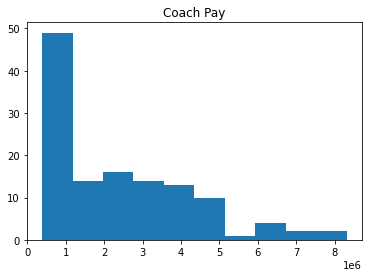

In [12]:
# EXPLORATORY ANALYSIS 
#
# Histogram of Public Awards
plt.hist(masterDF['TotalPay'])
plt.title("Coach Pay")

In [13]:
# Top paying schools
topPay = masterDF[masterDF['TotalPay']>5000000]
topPay[['School_Coaches','Coach','ConfCode','TotalPay']]

,School_Coaches,Coach,ConfCode,TotalPay
11,Clemson,Dabo Swinney,ACC,6543350.0
29,Texas,Tom Herman,Big 12,5500000.0
37,Michigan,Jim Harbaugh,Big Ten,7504000.0
42,Ohio State,Urban Meyer,Big Ten,7600000.0
101,Alabama,Nick Saban,SEC,8307000.0
103,Auburn,Gus Malzahn,SEC,6705656.0
104,Florida,Dan Mullen,SEC,6070000.0
105,Georgia,Kirby Smart,SEC,6603600.0
113,Texas A&M,Jimbo Fisher,SEC,7500000.0


In [14]:
# Lowest paying schools
lowPay = masterDF[masterDF['TotalPay']<450000]
lowPay[['School_Coaches','Coach','ConfCode','TotalPay']]

,School_Coaches,Coach,ConfCode,TotalPay
63,New Mexico State,Doug Martin,Ind.,419640.0
65,Akron,Terry Bowden,MAC,412500.0
66,Ball State,Mike Neu,MAC,435689.0
67,Bowling Green,Mike Jinks,MAC,437228.0
71,Kent State,Sean Lewis,MAC,440000.0
117,Coastal Carolina,Joe Moglia,Sun Belt,400000.0
121,Louisiana-Monroe,Matt Viator,Sun Belt,390000.0


In [15]:
#  Public Awards?

masterDF['AWDaverage'] = masterDF[['2015_PUB_AWARD','2014_PUB_AWARD',
                                '2013_PUB_AWARD','2012_PUB_AWARD',
                                '2011_PUB_AWARD','2010_PUB_AWARD',
                                '2009_PUB_AWARD','2008_PUB_AWARD',
                                '2007_PUB_AWARD','2006_PUB_AWARD']].mean(axis=1)
masterDF.head()

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay,...,2014_PUB_AWARD,2013_PUB_AWARD,2012_PUB_AWARD,2011_PUB_AWARD,2010_PUB_AWARD,2009_PUB_AWARD,2008_PUB_AWARD,2007_PUB_AWARD,2006_PUB_AWARD,AWDaverage
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,1700000.0,1700000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,2000000.0,2000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,1100000.0,1100000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,1102500.0,1102500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,1750000.0,1750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
masterDF2 = masterDF.drop(['2015_PUB_AWARD','2014_PUB_AWARD','2013_PUB_AWARD',
                           '2012_PUB_AWARD','2011_PUB_AWARD','2010_PUB_AWARD',
                           '2009_PUB_AWARD','2008_PUB_AWARD','2007_PUB_AWARD','2006_PUB_AWARD'], axis = 1)
masterDF2.describe()

,SchoolPay,TotalPay,GSR,FGR,Capacity,OverallW,OverallL,OverallPCT,ConfW,ConfL,...,2006_NUM_OF_ATHLETES,2005_APR_RATE,2005_ELIG_RATE,2005_RET_RATE,2005_NUM_OF_ATHLETES,2004_APR_RATE,2004_ELIG_RATE,2004_RET_RATE,2004_NUM_OF_ATHLETES,AWDaverage
count,1.250000e+02,1.250000e+02,123.000000,122.000000,122.000000,122.000000,122.000000,122.000000,121.000000,121.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,2.410301e+06,2.417061e+06,81.504065,62.942623,52544.778689,6.729508,6.049180,0.517279,4.057851,4.049587,...,79.821138,891.081301,-3.142179,-3.128106,79.894309,886.569106,-3.146520,-3.128665,79.406504,0.066667
std,1.881377e+06,1.885752e+06,8.637864,10.658717,23955.544591,3.206494,2.677894,0.228989,2.299629,2.305252,...,37.374935,206.684268,19.812767,19.815652,37.414123,206.281444,19.811876,19.815537,37.481107,0.180467
min,3.900000e+05,3.900000e+05,54.000000,30.000000,15314.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000
25%,8.015040e+05,8.058500e+05,75.000000,56.250000,30973.000000,4.000000,4.000000,0.333000,2.000000,2.000000,...,85.000000,910.000000,0.885885,0.909677,85.000000,904.500000,0.888545,0.910314,84.000000,0.000000
50%,1.831580e+06,1.900008e+06,82.000000,63.000000,50000.000000,7.000000,6.000000,0.538000,4.000000,4.000000,...,88.000000,934.000000,0.921212,0.932099,88.000000,932.000000,0.917647,0.935673,88.000000,0.000000
75%,3.605000e+06,3.617500e+06,88.000000,69.000000,66139.000000,9.000000,8.000000,0.692000,6.000000,6.000000,...,91.000000,954.500000,0.951066,0.955696,91.000000,947.000000,0.945468,0.952374,91.000000,0.000000
max,8.307000e+06,8.307000e+06,97.000000,95.000000,107601.000000,14.000000,12.000000,0.933000,8.000000,9.000000,...,98.000000,995.000000,0.996960,0.993921,97.000000,997.000000,1.000000,0.994318,101.000000,1.000000


Text(0.5, 1.0, 'Public Award Avg')

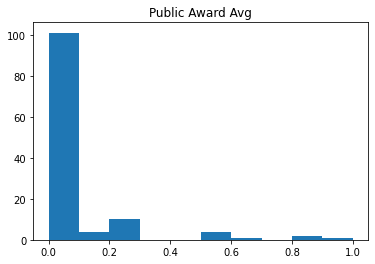

In [17]:
# Histogram of Public Awards
plt.hist(masterDF['AWDaverage'])
plt.title("Public Award Avg")

# If most teams are earning 0 awards, maybe
# the few who earn awards get paid more

In [18]:
# Top Public Award earning teams
TopPUBAWD = masterDF2[masterDF2['AWDaverage']>0.5]
TopPUBAWD[['School_Coaches','Coach','ConfCode', 'TotalPay']]

,School_Coaches,Coach,ConfCode,TotalPay
12,Duke,David Cutcliffe,ACC,2540928.0
41,Northwestern,Pat Fitzgerald,Big Ten,3619775.0
45,Rutgers,Chris Ash,Big Ten,2200000.0
77,Air Force,Troy Calhoun,Mt. West,885000.0
96,Stanford,David Shaw,Pac-12,4311543.0


In [19]:
# Maybe the size of the team or stadium is relevant.

col1, col2 = "TotalPay", "Capacity"
corr = masterDF[col1].corr(masterDF[col2])
print("Correlation is...", round(corr,2))

# well well...

Correlation is... 0.77


In [20]:
# Let's just do the big corr map
###  Easier to do with a smaller DF
#
#  APR 2006-2014 Average

masterDFa = masterDF2

masterDFa['APRaverage'] = masterDF2[['2014_APR_RATE','2013_APR_RATE','2012_APR_RATE',
                                     '2011_APR_RATE','2010_APR_RATE','2009_APR_RATE',
                                     '2008_APR_RATE','2007_APR_RATE','2006_APR_RATE',
                                     '2005_APR_RATE','2004_APR_RATE']].mean(axis=1)
masterDFa.head()

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay,...,2005_APR_RATE,2005_ELIG_RATE,2005_RET_RATE,2005_NUM_OF_ATHLETES,2004_APR_RATE,2004_ELIG_RATE,2004_RET_RATE,2004_NUM_OF_ATHLETES,AWDaverage,APRaverage
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,1700000.0,1700000.0,...,929.0,0.952381,0.905405,85.0,880.0,0.860759,0.898734,84.0,0.0,961.545455
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,2000000.0,2000000.0,...,950.0,0.931677,0.968944,88.0,910.0,0.877419,0.941935,83.0,0.0,946.727273
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,1100000.0,1100000.0,...,976.0,0.988304,0.958333,91.0,972.0,0.981132,0.962264,84.0,0.0,958.636364
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,1102500.0,1102500.0,...,911.0,0.878981,0.929936,82.0,917.0,0.922619,0.898810,91.0,0.0,939.545455
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,1750000.0,1750000.0,...,937.0,0.928144,0.927711,93.0,916.0,0.892216,0.910180,90.0,0.0,934.636364


In [21]:
# Quick check: Is APRaverage = MULTIYR_APR_RATE_1000?

masterDFa[['MULTIYR_APR_RATE_1000_RAW','MULTIYR_APR_RATE_1000_CI','MULTIYR_APR_RATE_1000_OFFICIAL','APRaverage']].head()

# No...and I don't know for sure how they got those bc they're weighted, so I'll stick with mine.

,MULTIYR_APR_RATE_1000_RAW,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,APRaverage
0,977.0,984.0,977.0,961.545455
1,962.0,970.0,962.0,946.727273
2,960.0,969.0,960.0,958.636364
3,950.0,960.0,950.0,939.545455
4,941.0,953.0,941.0,934.636364


In [22]:
#  ELIG 2006-2014 Average

masterDFb = masterDFa

masterDFb['ELIGaverage'] = masterDFa[['2014_ELIG_RATE','2013_ELIG_RATE','2012_ELIG_RATE',
                                     '2011_ELIG_RATE','2010_ELIG_RATE','2009_ELIG_RATE',
                                     '2008_ELIG_RATE','2007_ELIG_RATE','2006_ELIG_RATE',
                                     '2005_ELIG_RATE','2004_ELIG_RATE']].mean(axis=1)
masterDFb.head()

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay,...,2005_ELIG_RATE,2005_RET_RATE,2005_NUM_OF_ATHLETES,2004_APR_RATE,2004_ELIG_RATE,2004_RET_RATE,2004_NUM_OF_ATHLETES,AWDaverage,APRaverage,ELIGaverage
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,1700000.0,1700000.0,...,0.952381,0.905405,85.0,880.0,0.860759,0.898734,84.0,0.0,961.545455,0.964701
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,2000000.0,2000000.0,...,0.931677,0.968944,88.0,910.0,0.877419,0.941935,83.0,0.0,946.727273,0.933364
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,1100000.0,1100000.0,...,0.988304,0.958333,91.0,972.0,0.981132,0.962264,84.0,0.0,958.636364,0.963406
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,1102500.0,1102500.0,...,0.878981,0.929936,82.0,917.0,0.922619,0.898810,91.0,0.0,939.545455,0.928901
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,1750000.0,1750000.0,...,0.928144,0.927711,93.0,916.0,0.892216,0.910180,90.0,0.0,934.636364,0.922758


In [23]:
#  RET 2006-2014 Average

masterDFc = masterDFb

masterDFc['RETaverage'] = masterDFb[['2014_RET_RATE','2013_RET_RATE','2012_RET_RATE',
                                     '2011_RET_RATE','2010_RET_RATE','2009_RET_RATE',
                                     '2008_RET_RATE','2007_RET_RATE','2006_RET_RATE',
                                     '2005_RET_RATE','2004_RET_RATE']].mean(axis=1)
masterDFc.head()

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay,...,2005_RET_RATE,2005_NUM_OF_ATHLETES,2004_APR_RATE,2004_ELIG_RATE,2004_RET_RATE,2004_NUM_OF_ATHLETES,AWDaverage,APRaverage,ELIGaverage,RETaverage
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,1700000.0,1700000.0,...,0.905405,85.0,880.0,0.860759,0.898734,84.0,0.0,961.545455,0.964701,0.950912
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,2000000.0,2000000.0,...,0.968944,88.0,910.0,0.877419,0.941935,83.0,0.0,946.727273,0.933364,0.953073
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,1100000.0,1100000.0,...,0.958333,91.0,972.0,0.981132,0.962264,84.0,0.0,958.636364,0.963406,0.949453
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,1102500.0,1102500.0,...,0.929936,82.0,917.0,0.922619,0.898810,91.0,0.0,939.545455,0.928901,0.940604
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,1750000.0,1750000.0,...,0.927711,93.0,916.0,0.892216,0.910180,90.0,0.0,934.636364,0.922758,0.932483


In [24]:
#  NUMofAthletes 2006-2014 Average

masterDFd = masterDFc

masterDFd['numATHLTSavg'] = masterDFc[['2014_NUM_OF_ATHLETES','2013_NUM_OF_ATHLETES','2012_NUM_OF_ATHLETES',
                                     '2011_NUM_OF_ATHLETES','2010_NUM_OF_ATHLETES','2009_NUM_OF_ATHLETES',
                                     '2008_NUM_OF_ATHLETES','2007_NUM_OF_ATHLETES','2006_NUM_OF_ATHLETES',
                                     '2005_NUM_OF_ATHLETES','2004_NUM_OF_ATHLETES']].mean(axis=1)
print(list(masterDFd.columns.values))

['School_Coaches', 'SchoolName_ncaadata', 'SchoolName_footballDL', 'SchoolName_stadium', 'SchoolName_WinsLosses', 'ConfCode', 'Conference', 'Coach', 'SchoolPay', 'TotalPay', 'GSR', 'FGR', 'Capacity', 'OverallW', 'OverallL', 'OverallPCT', 'ConfW', 'ConfL', 'ConfPCT', 'PPGOff', 'PPGDef', 'SRS', 'SOS', 'SCL_DIV_14', 'SCL_SUB_14', 'SCL_HBCU', 'SCL_PRIVATE', 'MULTIYR_APR_RATE_1000_RAW', 'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL', 'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'MULTIYR_SQUAD_SIZE', '2014_APR_RATE', '2014_ELIG_RATE', '2014_RET_RATE', '2014_NUM_OF_ATHLETES', '2013_APR_RATE', '2013_ELIG_RATE', '2013_RET_RATE', '2013_NUM_OF_ATHLETES', '2012_APR_RATE', '2012_ELIG_RATE', '2012_RET_RATE', '2012_NUM_OF_ATHLETES', '2011_APR_RATE', '2011_ELIG_RATE', '2011_RET_RATE', '2011_NUM_OF_ATHLETES', '2010_APR_RATE', '2010_ELIG_RATE', '2010_RET_RATE', '2010_NUM_OF_ATHLETES', '2009_APR_RATE', '2009_ELIG_RATE', '2009_RET_RATE', '2009_NUM_OF_ATHLETES', '2008_APR_RATE', '2008_ELIG_RATE',

In [25]:
masterDF3 = masterDFd.drop(masterDFd.iloc[:, 33:77],axis=1)

print(list(masterDF3.columns.values))

['School_Coaches', 'SchoolName_ncaadata', 'SchoolName_footballDL', 'SchoolName_stadium', 'SchoolName_WinsLosses', 'ConfCode', 'Conference', 'Coach', 'SchoolPay', 'TotalPay', 'GSR', 'FGR', 'Capacity', 'OverallW', 'OverallL', 'OverallPCT', 'ConfW', 'ConfL', 'ConfPCT', 'PPGOff', 'PPGDef', 'SRS', 'SOS', 'SCL_DIV_14', 'SCL_SUB_14', 'SCL_HBCU', 'SCL_PRIVATE', 'MULTIYR_APR_RATE_1000_RAW', 'MULTIYR_APR_RATE_1000_CI', 'MULTIYR_APR_RATE_1000_OFFICIAL', 'MULTIYR_ELIG_RATE', 'MULTIYR_RET_RATE', 'MULTIYR_SQUAD_SIZE', 'AWDaverage', 'APRaverage', 'ELIGaverage', 'RETaverage', 'numATHLTSavg']


In [26]:
correlations = masterDF3.corr()
mask = np.triu(np.ones_like(correlations, dtype = bool))
correlations = correlations.mask(mask)

correlations

,SchoolPay,TotalPay,GSR,FGR,Capacity,OverallW,OverallL,OverallPCT,ConfW,ConfL,...,MULTIYR_APR_RATE_1000_CI,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,MULTIYR_SQUAD_SIZE,AWDaverage,APRaverage,ELIGaverage,RETaverage,numATHLTSavg
SchoolPay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalPay,0.999692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GSR,0.047551,0.047734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FGR,-0.098672,-0.098159,0.647229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity,0.768342,0.768334,-0.008287,-0.176803,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallW,0.410083,0.412379,-0.085748,-0.036798,0.333203,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallL,-0.414555,-0.416080,0.091594,0.040822,-0.330922,-0.987866,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallPCT,0.404725,0.406355,-0.084977,-0.040849,0.331368,0.994381,-0.996463,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfW,0.227038,0.227772,-0.102369,-0.086138,0.167868,0.888898,-0.870560,0.880331,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfL,-0.185586,-0.185792,0.080553,0.042749,-0.170474,-0.905982,0.892565,-0.899573,-0.934292,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

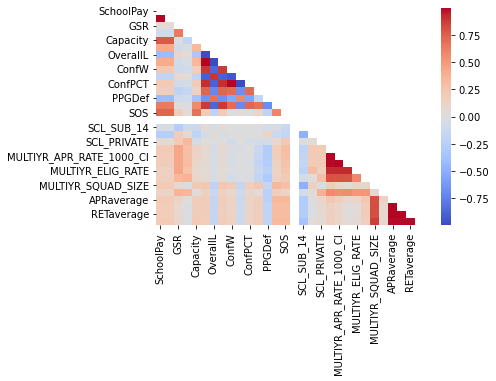

In [27]:
sns.heatmap(correlations, cmap='coolwarm')

# Disregard relationship to Total Pay. Strongest correlations to School Pay seem to be Capacity, SRS and SOS. Could also look into Overall W and Overall PCT.

In [28]:
# Focus on Conference, Capacity, SOS, Wins
###  Turn Conference into #s

confNum = []
for row in masterDF3["ConfCode"]:
    if row == 'AAC': confNum.append('1')
    elif row == 'ACC': confNum.append('2')
    elif row == 'Big 12': confNum.append('3')
    elif row == 'Big Ten': confNum.append('4')
    elif row == 'C-USA': confNum.append('5')
    elif row == 'Ind.': confNum.append('6')
    elif row == 'MAC': confNum.append('7')
    elif row == 'Mt. West': confNum.append('8')
    elif row == 'Pac-12': confNum.append('9')
    elif row == 'SEC': confNum.append('10')
    elif row == 'Sun Belt': confNum.append('11')
    else: confNum.append('noconf')

In [30]:
masterDF3['confNum'] = confNum
masterDF3

,School_Coaches,SchoolName_ncaadata,SchoolName_footballDL,SchoolName_stadium,SchoolName_WinsLosses,ConfCode,Conference,Coach,SchoolPay,TotalPay,...,MULTIYR_APR_RATE_1000_OFFICIAL,MULTIYR_ELIG_RATE,MULTIYR_RET_RATE,MULTIYR_SQUAD_SIZE,AWDaverage,APRaverage,ELIGaverage,RETaverage,numATHLTSavg,confNum
0,Central Florida,University of Central Florida,University of Central Florida,UCF,UCF,AAC,American Athletic Conference,Josh Heupel,1700000.0,1700000.0,...,977.0,0.977671,0.969055,344.0,0.0,961.545455,0.964701,0.950912,86.909091,1
1,Cincinnati,University of Cincinnati,University of Cincinnati,Cincinnati,Cincinnati,AAC,American Athletic Conference,Luke Fickell,2000000.0,2000000.0,...,962.0,0.957111,0.952417,372.0,0.0,946.727273,0.933364,0.953073,90.545455,1
2,Connecticut,University of Connecticut,University of Connecticut,Connecticut,Connecticut,AAC,American Athletic Conference,Randy Edsall,1100000.0,1100000.0,...,960.0,0.964800,0.948220,346.0,0.0,958.636364,0.963406,0.949453,86.636364,1
3,East Carolina,East Carolina University,East Carolina University,East Carolina,East Carolina,AAC,American Athletic Conference,Scottie Montgomery,1102500.0,1102500.0,...,950.0,0.937008,0.951181,352.0,0.0,939.545455,0.928901,0.940604,90.272727,1
4,Houston,University of Houston,University of Houston,Houston,Houston,AAC,American Athletic Conference,Major Applewhite,1750000.0,1750000.0,...,941.0,0.928251,0.939668,364.0,0.0,934.636364,0.922758,0.932483,89.363636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Louisiana-Lafayette,University of Louisiana at Lafayette,University of Louisiana at Lafayette,Louisiana-Lafayette,Louisiana,Sun Belt,Sun Belt Conference,Billy Napier,850000.0,850000.0,...,953.0,0.948529,0.950893,378.0,0.0,933.454545,0.904580,0.947736,92.090909,11
121,Louisiana-Monroe,University of Louisiana Monroe,University of Louisiana at Monroe,Louisiana-Monroe,Louisiana-Monroe,Sun Belt,Sun Belt Conference,Matt Viator,390000.0,390000.0,...,969.0,0.975610,0.952459,338.0,0.0,928.545455,0.913187,0.938110,85.909091,11
122,South Alabama,University of South Alabama,University of South Alabama,South Alabama,South Alabama,Sun Belt,Sun Belt Conference,Steve Campbell,600000.0,600000.0,...,955.0,0.937500,0.943396,263.0,0.0,185.000000,-71.744346,-71.742735,-48.090909,11
123,Texas State,Texas State University,Texas State University,Texas State,Texas State,Sun Belt,Sun Belt Conference,Everett Withers,700000.0,700000.0,...,958.0,0.943164,0.955316,356.0,0.0,939.454545,0.915590,0.944881,84.545455,11


In [42]:
# Train and Test
###  salary  ~  confNum + Capacity + SOS + Wins
#

#masterDF4 = masterDF3[['School_Coaches','SchoolPay','Capacity','SOS',"OverallW",'confNum']]
#masterDF4

,School_Coaches,SchoolPay,Capacity,SOS,OverallW,confNum
0,Central Florida,1700000.0,45323.0,-0.68,0.0,1
1,Cincinnati,2000000.0,40000.0,-0.65,7.0,1
2,Connecticut,1100000.0,40000.0,-1.37,6.0,1
3,East Carolina,1102500.0,50000.0,-0.93,5.0,1
4,Houston,1750000.0,40000.0,-3.04,13.0,1
...,...,...,...,...,...,...
120,Louisiana-Lafayette,850000.0,36900.0,-7.38,4.0,11
121,Louisiana-Monroe,390000.0,30427.0,-4.42,2.0,11
122,South Alabama,600000.0,33500.0,-3.72,5.0,11
123,Texas State,700000.0,30000.0,-5.16,3.0,11


In [35]:
np.random.seed(1234)
masterDF4['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF4))
masterDF4_train = masterDF4[masterDF4['runiform'] >= 0.33]
masterDF4_test = masterDF4[masterDF4['runiform'] < 0.33]
# check training data frame
print('\nmasterDF4_train data frame (rows, columns): ',masterDF4_train.shape)
print(masterDF4_train.head())
# check test data frame
print('\nmasterDF4_test data frame (rows, columns): ',masterDF4_test.shape)
print(masterDF4_test.head())  


masterDF4_train data frame (rows, columns):  (90, 7)
  School_Coaches  SchoolPay  Capacity   SOS  OverallW confNum  runiform
1     Cincinnati  2000000.0   40000.0 -0.65       7.0       1  0.622109
2    Connecticut  1100000.0   40000.0 -1.37       6.0       1  0.437728
3  East Carolina  1102500.0   50000.0 -0.93       5.0       1  0.785359
4        Houston  1750000.0   40000.0 -3.04      13.0       1  0.779976
7  South Florida  1000000.0   65857.0 -0.74       8.0       1  0.801872

masterDF4_test data frame (rows, columns):  (35, 7)
     School_Coaches  SchoolPay  Capacity   SOS  OverallW confNum  runiform
0   Central Florida  1700000.0   45323.0 -0.68       0.0       1  0.191519
5           Memphis  2600000.0   62380.0  0.16       9.0       1  0.272593
6              Navy  2163000.0   34000.0 -1.55      11.0       1  0.276464
17   North Carolina  2575000.0   62980.0  1.09      11.0       2  0.013768
22    Virginia Tech  4000000.0   66233.0  1.65       7.0       2  0.075381


C:\Users\mmosi\AppData\Local\Temp/ipykernel_14320/2717322771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterDF4['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF4))


In [40]:
# specify a simple model
my_model = str('SchoolPay ~ Capacity + SOS + OverallW + confNum')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = masterDF4_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     22.33
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.39e-20
Time:                        23:51:31   Log-Likelihood:                -1310.5
No. Observations:                  87   AIC:                             2649.
Df Residuals:                      73   BIC:                             2683.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.797e+05   5.14e+05     -1.128

In [43]:
#  ...just to see. Let's remove OverallW

# Train and Test
###  salary  ~  confNum + Capacity + SOS + Wins
#

masterDF5 = masterDF3[['School_Coaches','SchoolPay','Capacity','SOS','confNum']]
masterDF5

,School_Coaches,SchoolPay,Capacity,SOS,confNum
0,Central Florida,1700000.0,45323.0,-0.68,1
1,Cincinnati,2000000.0,40000.0,-0.65,1
2,Connecticut,1100000.0,40000.0,-1.37,1
3,East Carolina,1102500.0,50000.0,-0.93,1
4,Houston,1750000.0,40000.0,-3.04,1
...,...,...,...,...,...
120,Louisiana-Lafayette,850000.0,36900.0,-7.38,11
121,Louisiana-Monroe,390000.0,30427.0,-4.42,11
122,South Alabama,600000.0,33500.0,-3.72,11
123,Texas State,700000.0,30000.0,-5.16,11


In [44]:
np.random.seed(1234)
masterDF5['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF5))
masterDF5_train = masterDF5[masterDF5['runiform'] >= 0.33]
masterDF5_test = masterDF5[masterDF5['runiform'] < 0.33]
# check training data frame
print('\nmasterDF5_train data frame (rows, columns): ',masterDF5_train.shape)
print(masterDF5_train.head())
# check test data frame
print('\nmasterDF5_test data frame (rows, columns): ',masterDF5_test.shape)
print(masterDF5_test.head())  


masterDF5_train data frame (rows, columns):  (90, 6)
  School_Coaches  SchoolPay  Capacity   SOS confNum  runiform
1     Cincinnati  2000000.0   40000.0 -0.65       1  0.622109
2    Connecticut  1100000.0   40000.0 -1.37       1  0.437728
3  East Carolina  1102500.0   50000.0 -0.93       1  0.785359
4        Houston  1750000.0   40000.0 -3.04       1  0.779976
7  South Florida  1000000.0   65857.0 -0.74       1  0.801872

masterDF5_test data frame (rows, columns):  (35, 6)
     School_Coaches  SchoolPay  Capacity   SOS confNum  runiform
0   Central Florida  1700000.0   45323.0 -0.68       1  0.191519
5           Memphis  2600000.0   62380.0  0.16       1  0.272593
6              Navy  2163000.0   34000.0 -1.55       1  0.276464
17   North Carolina  2575000.0   62980.0  1.09       2  0.013768
22    Virginia Tech  4000000.0   66233.0  1.65       2  0.075381


C:\Users\mmosi\AppData\Local\Temp/ipykernel_14320/3019755592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterDF5['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF5))


In [45]:
# specify a simple model
my_model = str('SchoolPay ~ Capacity + SOS + confNum')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = masterDF5_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     20.08
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.24e-18
Time:                        00:00:25   Log-Likelihood:                -1317.3
No. Observations:                  87   AIC:                             2661.
Df Residuals:                      74   BIC:                             2693.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         -4e+04   5.27e+05     -0.076

In [46]:
# Maybe I'm supposed to use the whole dataset

np.random.seed(1234)
masterDF3['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF3))
masterDF3_train = masterDF3[masterDF3['runiform'] >= 0.33]
masterDF3_test = masterDF3[masterDF3['runiform'] < 0.33]
# check training data frame
print('\nmasterDF3_train data frame (rows, columns): ',masterDF3_train.shape)
print(masterDF3_train.head())
# check test data frame
print('\nmasterDF3_test data frame (rows, columns): ',masterDF3_test.shape)
print(masterDF3_test.head())  


masterDF3_train data frame (rows, columns):  (90, 40)
  School_Coaches          SchoolName_ncaadata        SchoolName_footballDL  \
1     Cincinnati     University of Cincinnati     University of Cincinnati   
2    Connecticut    University of Connecticut    University of Connecticut   
3  East Carolina     East Carolina University     East Carolina University   
4        Houston        University of Houston        University of Houston   
7  South Florida  University of South Florida  University of South Florida   

  SchoolName_stadium SchoolName_WinsLosses ConfCode  \
1         Cincinnati            Cincinnati      AAC   
2        Connecticut           Connecticut      AAC   
3      East Carolina         East Carolina      AAC   
4            Houston               Houston      AAC   
7                USF         South Florida      AAC   

                     Conference               Coach  SchoolPay   TotalPay  \
1  American Athletic Conference        Luke Fickell  2000000.0  2000

In [48]:
# specify a simple model
my_model = str('SchoolPay ~ Capacity + SOS')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = masterDF3_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     96.49
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.72e-22
Time:                        00:09:13   Log-Likelihood:                -1328.4
No. Observations:                  87   AIC:                             2663.
Df Residuals:                      84   BIC:                             2670.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.193e+05   3.66e+05      0.326      0.7

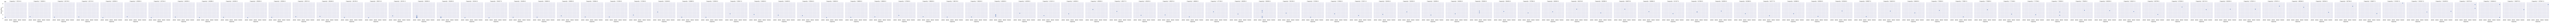

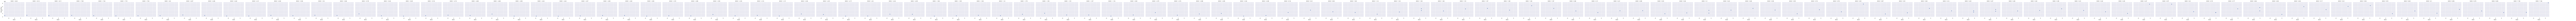

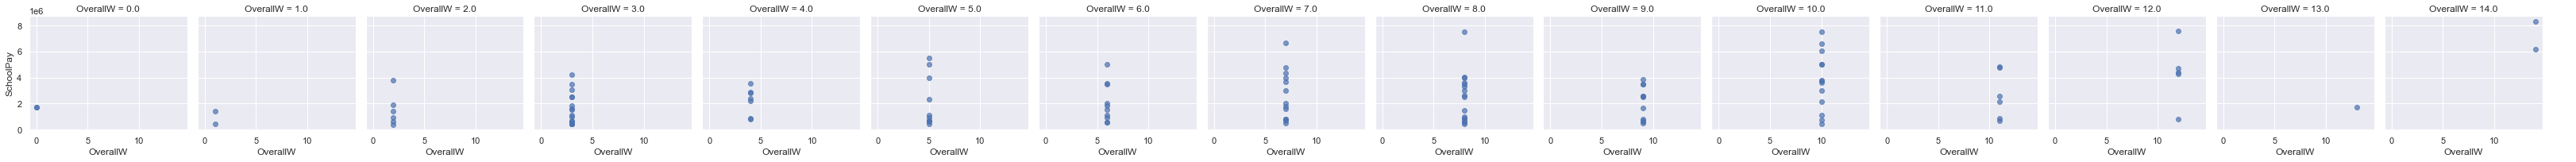

In [52]:
# Scatterplots just to check relationships
# TRELLIS / LATTICE PLOT 
sns.set(style="darkgrid")

g = sns.FacetGrid(masterDF3, col="Capacity")
g.map(plt.scatter, "Capacity", "SchoolPay", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(masterDF3, col="SOS")
g.map(plt.scatter, "SOS", "SchoolPay", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(masterDF3, col="OverallW")
g.map(plt.scatter, "OverallW", "SchoolPay", alpha=.7)
g.add_legend();
plt.show()

#omg lol

In [55]:
x = masterDF3['SchoolPay']
y = masterDF3['Capacity']
z = masterDF3['SOS']
a = masterDF3['OverallW']
b = masterDF3['confNum']

Text(0.5, 1.0, 'SchoolPay vs. Capacity')

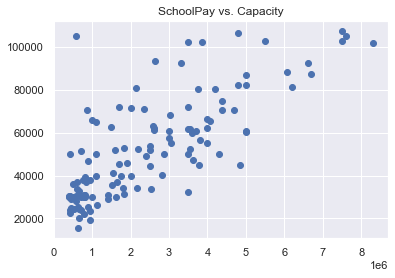

In [59]:
plt.scatter(x,y)
plt.title('SchoolPay vs. Capacity')

Text(0.5, 1.0, 'SchoolPay vs. SOS')

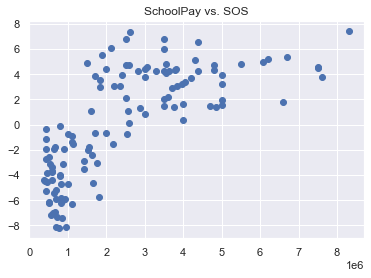

In [56]:
plt.scatter(x,z)
plt.title('SchoolPay vs. SOS')

Text(0.5, 1.0, 'SchoolPay vs. OverallW')

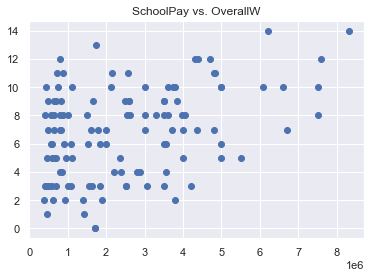

In [57]:
plt.scatter(x,a)
plt.title('SchoolPay vs. OverallW')

Text(0.5, 1.0, 'SchoolPay vs. confNum')

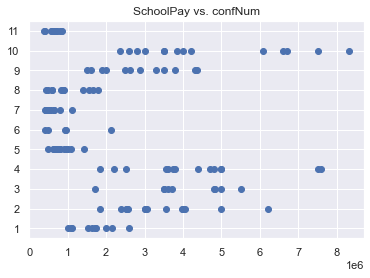

In [58]:
plt.scatter(x,b)
plt.title('SchoolPay vs. confNum')

In [60]:
np.random.seed(1234)
masterDF5['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF5))
masterDF5_train = masterDF5[masterDF5['runiform'] >= 0.33]
masterDF5_test = masterDF5[masterDF5['runiform'] < 0.33]
# check training data frame
print('\nmasterDF5_train data frame (rows, columns): ',masterDF5_train.shape)
print(masterDF5_train.head())
# check test data frame
print('\nmasterDF5_test data frame (rows, columns): ',masterDF5_test.shape)
print(masterDF5_test.head())  


masterDF5_train data frame (rows, columns):  (90, 6)
  School_Coaches  SchoolPay  Capacity   SOS confNum  runiform
1     Cincinnati  2000000.0   40000.0 -0.65       1  0.622109
2    Connecticut  1100000.0   40000.0 -1.37       1  0.437728
3  East Carolina  1102500.0   50000.0 -0.93       1  0.785359
4        Houston  1750000.0   40000.0 -3.04       1  0.779976
7  South Florida  1000000.0   65857.0 -0.74       1  0.801872

masterDF5_test data frame (rows, columns):  (35, 6)
     School_Coaches  SchoolPay  Capacity   SOS confNum  runiform
0   Central Florida  1700000.0   45323.0 -0.68       1  0.191519
5           Memphis  2600000.0   62380.0  0.16       1  0.272593
6              Navy  2163000.0   34000.0 -1.55       1  0.276464
17   North Carolina  2575000.0   62980.0  1.09       2  0.013768
22    Virginia Tech  4000000.0   66233.0  1.65       2  0.075381


C:\Users\mmosi\AppData\Local\Temp/ipykernel_14320/3019755592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masterDF5['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(masterDF5))


In [64]:
# specify a simple model
my_model = str('SchoolPay ~ Capacity')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = masterDF5_train).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:              SchoolPay   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     151.6
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.12e-20
Time:                        00:32:30   Log-Likelihood:                -1351.2
No. Observations:                  88   AIC:                             2706.
Df Residuals:                      86   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.404e+05   2.94e+05     -2.861      0.0